In [21]:
import networkx as nx
from copy import deepcopy
from operator import itemgetter
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
def check_completeness(solution, variables):
    return True if len(solution) == len(variables) else False

In [23]:
def static_variable_selection(solution, csp, debug=True):
    unassigned_variables = [x for x in csp[0] if x not in solution]
    variable = unassigned_variables[0]
    if debug: print("Selected variable:"+ str(variable))
    return variable

In [24]:
def static_domain_selection(variable, assignment, csp, debug=True):
    for domain_value in csp[1][variable]:
        if debug: print("Selected value" + str(domain_value) + "for" + str(variable) )
        yield domain_value

In [25]:
def check_value_consistency(variable, value, assignment, constraints, debug=True):
    if assignment is None: return False
    for v in constraints:
        if v in assignment:
            if value is assignment[v]:
                if debug: print(str(variable)+":"+ str(value)+ "conflicts with"+str(v)+" :" + str(assignment[v]))
                return False
    return True

In [26]:
def no_inference(csp, variable, value, assignment, debug=True):
    return True

In [27]:
def backtrack(assignment, csp, params, debug=True):
    select_unassigned_variable, order_domain_values, inference = params
    if debug: print("Solution: " +str(assignment))
    if check_completeness(assignment, csp[0]): return True, assignment
    variable = select_unassigned_variable(assignment, csp, debug=debug)
    for value in order_domain_values(variable, assignment, csp, debug):
        if check_value_consistency(variable, value, assignment, csp[2][variable], debug=debug):
            assignment[variable], m_csp = value, deepcopy(csp)
            if inference(csp, variable, value, assignment, debug=debug):
                result, assignment = backtrack(deepcopy(assignment), csp, params, debug=debug)
                if result: return True, assignment
            del assignment[variable]
            csp = m_csp
    return False, assignment

In [28]:
def backtracking_search(csp, params, debug=True):
    solution = dict()
    return backtrack(solution, csp, params, debug=debug)

In [29]:
def get_adjacency_list(nodes, edges):
    adjacency_list = dict()
    for node in nodes:
        aList = set()
        [aList.add(x) for x, y in edges if x != node and y == node]
        [aList.add(y) for x, y in edges if y != node and x == node]
        adjacency_list[node] = aList
    return adjacency_list

In [30]:
def minimum_remaining_values():
    pass
def forward_checking():
    pass
def least_contraining_value():
    pass


In [31]:
def color_map(world, colors=["blue", "green", "red", "yellow"], params=(minimum_remaining_values, least_contraining_value, forward_checking), debug=True):
    variables = world[0]
    domains = dict([(x, colors) for x in variables])
    constraints = get_adjacency_list(world[0], world[1])
    result, solution = backtracking_search((variables, domains, constraints), params, debug=debug)
    if not result: print("No Solution")                  
    else: return solution

In [32]:
def draw_color_map(world, colors, pos=None):
    if colors is None: return
    fig = plt.figure()
   
    G = nx.Graph()
    if pos is None:
        pos = nx.spring_layout(G)
    G.add_nodes_from(world[0])
    G.add_edges_from(world[1])
    node_colors = [colors[x] for x in G.nodes()]
    nx.draw(G, node_color=node_colors, node_size=700, alpha=0.5)
    plt.axis('off')
    fig.set_size_inches(8, 8)
    plt.show()

In [33]:
def autralia_map():
    nodes = ["Western Australia", "Northern Territory", "South Australia", "Queensland", "New South Wales", "Victoria"]
    edges = [("Western Australia","Northern Territory"), ("Western Australia","South Australia"),
             ("Northern Territory","South Australia"),("Northern Territory","Queensland"),
             ("South Australia","Queensland"),
             ("Queensland","New South Wales"),
             ("New South Wales","South Australia"), ("New South Wales","Victoria"),
             ("Victoria","South Australia")]
    return (nodes, edges)

Solution: {}
Selected variable:Western Australia
Selected valueblueforWestern Australia
Solution: {'Western Australia': 'blue'}
Selected variable:Northern Territory
Selected valueblueforNorthern Territory
Northern Territory:blueconflicts withWestern Australia :blue
Selected valuegreenforNorthern Territory
Solution: {'Western Australia': 'blue', 'Northern Territory': 'green'}
Selected variable:South Australia
Selected valueblueforSouth Australia
South Australia:blueconflicts withWestern Australia :blue
Selected valuegreenforSouth Australia
South Australia:greenconflicts withNorthern Territory :green
Selected valueredforSouth Australia
Solution: {'Western Australia': 'blue', 'Northern Territory': 'green', 'South Australia': 'red'}
Selected variable:Queensland
Selected valueblueforQueensland
Solution: {'Western Australia': 'blue', 'Northern Territory': 'green', 'South Australia': 'red', 'Queensland': 'blue'}
Selected variable:New South Wales
Selected valueblueforNew South Wales
New South 

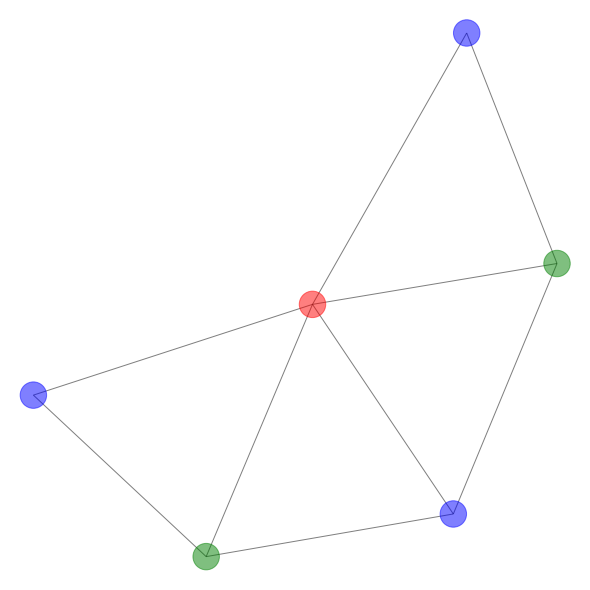

In [34]:
world = autralia_map()
solution = color_map(world, params=(static_variable_selection, static_domain_selection, no_inference))
draw_color_map(world, solution)

In [35]:
def minimum_remaining_values(solution, csp, debug=True):
    unassigned_variables = [x for x in csp[0] if x not in solution]
    variable_domain_count = [(x, len(csp[1][x])) for x in unassigned_variables]
    variables = sorted(variable_domain_count, key=itemgetter(1))
    if debug: print(" Selected variable " +str(variables[0][0])+ " with value count " + str(variables[0][1]))
    return variables[0][0]

In [36]:
def forward_checking(csp, variable, value, assignment, debug=True):
    unassigned_neighbors = [y for y in csp[2][variable] if y not in assignment]
    for x in unassigned_neighbors:
        if value in csp[1][x]:
            if debug: print(" Removing " +str(value) + " from " +str(x))
            csp[1][x] = [c for c in csp[1][x] if c is not value]
        if len(csp[1][x]) == 0: return False
    return True

In [37]:
world = autralia_map()
solution = color_map(world, params=(minimum_remaining_values, static_domain_selection, forward_checking))
draw_color_map(world, solution)

Solution: {}
 Selected variable Western Australia with value count 4
Selected valueblueforWestern Australia
 Removing blue from South Australia
 Removing blue from Northern Territory
Solution: {'Western Australia': 'blue'}
 Selected variable Northern Territory with value count 3
Selected valuegreenforNorthern Territory
 Removing green from South Australia
 Removing green from Queensland
Solution: {'Western Australia': 'blue', 'Northern Territory': 'green'}
 Selected variable South Australia with value count 2
Selected valueredforSouth Australia
 Removing red from Victoria
 Removing red from Queensland
 Removing red from New South Wales
Solution: {'Western Australia': 'blue', 'Northern Territory': 'green', 'South Australia': 'red'}
 Selected variable Queensland with value count 2
Selected valueblueforQueensland
 Removing blue from New South Wales
Solution: {'Western Australia': 'blue', 'Northern Territory': 'green', 'South Australia': 'red', 'Queensland': 'blue'}
 Selected variable New 

In [38]:
def least_contraining_value(variable, assignment, csp, debug=True):
    neighbors = csp[2][variable]
    value_count = []
    for value in csp[1][variable]:
        count = 0
        for neighbor in neighbors:
            if value in csp[1][neighbor]:
                count = count + 1
        value_count.append((value, count))
    counted = sorted(value_count, key=itemgetter(1), reverse=True)
    for value, count in counted:
        if debug: print("  Selected value " + str(value) + "for " + str(variable) )
        yield value

In [39]:
def degree_heuristic(solution, csp, debug=True):
    unassigned_variables = [x for x in csp[0] if x not in solution]
    variable_domain_count = [(x, len(csp[2][x])) for x in unassigned_variables]
    variables = sorted(variable_domain_count, key=itemgetter(1), reverse=True)
    if debug: print ("  Selected variable "+ str(variables[0][0])+ " with constraint count " + str(variables[0][1]))
    return variables[0][0]

In [40]:
world = autralia_map()
solution = color_map(world, params=(degree_heuristic, least_contraining_value, forward_checking),)
draw_color_map(world, solution)

Solution: {}
  Selected variable South Australia with constraint count 5
  Selected value bluefor South Australia
 Removing blue from Victoria
 Removing blue from Queensland
 Removing blue from Western Australia
 Removing blue from New South Wales
 Removing blue from Northern Territory
Solution: {'South Australia': 'blue'}
  Selected variable Northern Territory with constraint count 3
  Selected value greenfor Northern Territory
 Removing green from Western Australia
 Removing green from Queensland
Solution: {'South Australia': 'blue', 'Northern Territory': 'green'}
  Selected variable Queensland with constraint count 3
  Selected value redfor Queensland
 Removing red from New South Wales
Solution: {'South Australia': 'blue', 'Northern Territory': 'green', 'Queensland': 'red'}
  Selected variable New South Wales with constraint count 3
  Selected value yellowfor New South Wales
 Removing yellow from Victoria
Solution: {'South Australia': 'blue', 'Northern Territory': 'green', 'Queensla